In [164]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, recall_score 

In [165]:
df=pd.read_csv('large_data.csv')

In [166]:
df

,COUGH,MUSCLE_ACHES,TIREDNESS,SORE_THROAT,RUNNY_NOSE,STUFFY_NOSE,FEVER,NAUSEA,VOMITING,DIARRHEA,...,DIFFICULTY_BREATHING,LOSS_OF_TASTE,LOSS_OF_SMELL,ITCHY_NOSE,ITCHY_EYES,ITCHY_MOUTH,ITCHY_INNER_EAR,SNEEZING,PINK_EYE,TYPE
0,0,0,1,0,1,0,0,0,0,0,...,0,1,0,1,0,0,1,0,1,ALLERGY
1,0,0,1,0,0,0,0,0,0,0,...,0,1,0,1,0,1,1,1,1,ALLERGY
2,0,1,1,1,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,1,ALLERGY
3,0,0,0,1,1,0,0,0,0,0,...,0,1,1,0,0,1,0,1,1,ALLERGY
4,0,0,1,0,1,0,0,0,0,0,...,0,1,1,0,1,0,1,1,1,ALLERGY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44448,1,0,0,1,0,0,1,0,1,1,...,0,0,0,0,0,0,0,1,0,FLU
44449,1,1,0,1,1,0,1,1,0,1,...,0,1,1,0,0,0,0,1,0,FLU
44450,0,0,1,0,1,0,0,0,1,1,...,1,1,0,0,0,0,0,1,0,FLU
44451,0,0,0,1,1,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,FLU


In [167]:
df.isna().sum()

COUGH                   0
MUSCLE_ACHES            0
TIREDNESS               0
SORE_THROAT             0
RUNNY_NOSE              0
STUFFY_NOSE             0
FEVER                   0
NAUSEA                  0
VOMITING                0
DIARRHEA                0
SHORTNESS_OF_BREATH     0
DIFFICULTY_BREATHING    0
LOSS_OF_TASTE           0
LOSS_OF_SMELL           0
ITCHY_NOSE              0
ITCHY_EYES              0
ITCHY_MOUTH             0
ITCHY_INNER_EAR         0
SNEEZING                0
PINK_EYE                0
TYPE                    0
dtype: int64

In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44453 entries, 0 to 44452
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   COUGH                 44453 non-null  int64 
 1   MUSCLE_ACHES          44453 non-null  int64 
 2   TIREDNESS             44453 non-null  int64 
 3   SORE_THROAT           44453 non-null  int64 
 4   RUNNY_NOSE            44453 non-null  int64 
 5   STUFFY_NOSE           44453 non-null  int64 
 6   FEVER                 44453 non-null  int64 
 7   NAUSEA                44453 non-null  int64 
 8   VOMITING              44453 non-null  int64 
 9   DIARRHEA              44453 non-null  int64 
 10  SHORTNESS_OF_BREATH   44453 non-null  int64 
 11  DIFFICULTY_BREATHING  44453 non-null  int64 
 12  LOSS_OF_TASTE         44453 non-null  int64 
 13  LOSS_OF_SMELL         44453 non-null  int64 
 14  ITCHY_NOSE            44453 non-null  int64 
 15  ITCHY_EYES            44453 non-null

In [169]:
df.duplicated().sum()

0

In [170]:
for column in df.columns:
    print(f"Column: {column}")
    print(f"Unique values: {df[column].unique()}")
    

Column: COUGH
Unique values: [0 1]
Column: MUSCLE_ACHES
Unique values: [0 1]
Column: TIREDNESS
Unique values: [1 0]
Column: SORE_THROAT
Unique values: [0 1]
Column: RUNNY_NOSE
Unique values: [1 0]
Column: STUFFY_NOSE
Unique values: [0 1]
Column: FEVER
Unique values: [0 1]
Column: NAUSEA
Unique values: [0 1]
Column: VOMITING
Unique values: [0 1]
Column: DIARRHEA
Unique values: [0 1]
Column: SHORTNESS_OF_BREATH
Unique values: [0 1]
Column: DIFFICULTY_BREATHING
Unique values: [0 1]
Column: LOSS_OF_TASTE
Unique values: [1 0]
Column: LOSS_OF_SMELL
Unique values: [0 1]
Column: ITCHY_NOSE
Unique values: [1 0]
Column: ITCHY_EYES
Unique values: [0 1]
Column: ITCHY_MOUTH
Unique values: [0 1]
Column: ITCHY_INNER_EAR
Unique values: [1 0]
Column: SNEEZING
Unique values: [0 1]
Column: PINK_EYE
Unique values: [1 0]
Column: TYPE
Unique values: ['ALLERGY' 'COLD' 'COVID' 'FLU']


In [171]:
df_new = df.drop(columns='TYPE')


In [172]:
correlation=df_new.corr()
correlation

,COUGH,MUSCLE_ACHES,TIREDNESS,SORE_THROAT,RUNNY_NOSE,STUFFY_NOSE,FEVER,NAUSEA,VOMITING,DIARRHEA,SHORTNESS_OF_BREATH,DIFFICULTY_BREATHING,LOSS_OF_TASTE,LOSS_OF_SMELL,ITCHY_NOSE,ITCHY_EYES,ITCHY_MOUTH,ITCHY_INNER_EAR,SNEEZING,PINK_EYE
COUGH,1.000000,-0.006751,-0.006131,-0.006357,-0.004079,-0.005263,0.013227,0.011657,0.010091,0.011686,0.011211,0.009665,0.023971,0.020439,-0.019659,-0.019659,-0.019659,-0.019659,-0.007885,-0.019656
MUSCLE_ACHES,-0.006751,1.000000,-0.005879,-0.005115,-0.004903,-0.004737,0.013419,0.009344,0.011051,0.009273,0.010917,0.005815,0.020134,0.020613,-0.018801,-0.018801,-0.018801,-0.018801,-0.004571,-0.018682
TIREDNESS,-0.006131,-0.005879,1.000000,-0.007378,-0.003460,-0.004285,0.012271,0.008773,0.009998,0.011203,0.012270,0.009956,0.019720,0.020929,-0.018930,-0.018930,-0.018930,-0.018930,-0.004401,-0.018927
SORE_THROAT,-0.006357,-0.005115,-0.007378,1.000000,-0.003828,-0.004744,0.012156,0.007886,0.009689,0.008196,0.010900,0.008877,0.022103,0.017297,-0.018415,-0.018415,-0.018415,-0.018415,-0.005801,-0.018529
RUNNY_NOSE,-0.004079,-0.004903,-0.003460,-0.003828,1.000000,0.041040,-0.007682,-0.005257,-0.008614,-0.004647,-0.008821,-0.006934,0.060959,0.060366,0.003582,0.003582,0.003582,0.003582,-0.004189,0.003698
STUFFY_NOSE,-0.005263,-0.004737,-0.004285,-0.004744,0.041040,1.000000,-0.005134,-0.006265,-0.008853,-0.009120,-0.008388,-0.007461,0.058063,0.059747,0.003946,0.003946,0.003946,0.003946,-0.002043,0.004061
FEVER,0.013227,0.013419,0.012271,0.012156,-0.007682,-0.005134,1.000000,0.280095,0.278506,0.277233,0.277221,0.279749,-0.050197,-0.049666,-0.330111,-0.330111,-0.330111,-0.330111,0.010489,-0.330062
NAUSEA,0.011657,0.009344,0.008773,0.007886,-0.005257,-0.006265,0.280095,1.000000,0.299449,0.301886,0.300841,0.303055,-0.041432,-0.040998,-0.329249,-0.329249,-0.329249,-0.329249,0.008333,-0.329200
VOMITING,0.010091,0.011051,0.009998,0.009689,-0.008614,-0.008853,0.278506,0.299449,1.000000,0.300497,0.300582,0.300948,-0.042111,-0.043136,-0.329452,-0.329452,-0.329452,-0.329452,0.009366,-0.329403
DIARRHEA,0.011686,0.009273,0.011203,0.008196,-0.004647,-0.009120,0.277233,0.301886,0.300497,1.000000,0.297675,0.301024,-0.042451,-0.044059,-0.328658,-0.328658,-0.328658,-0.328658,0.011435,-0.328609


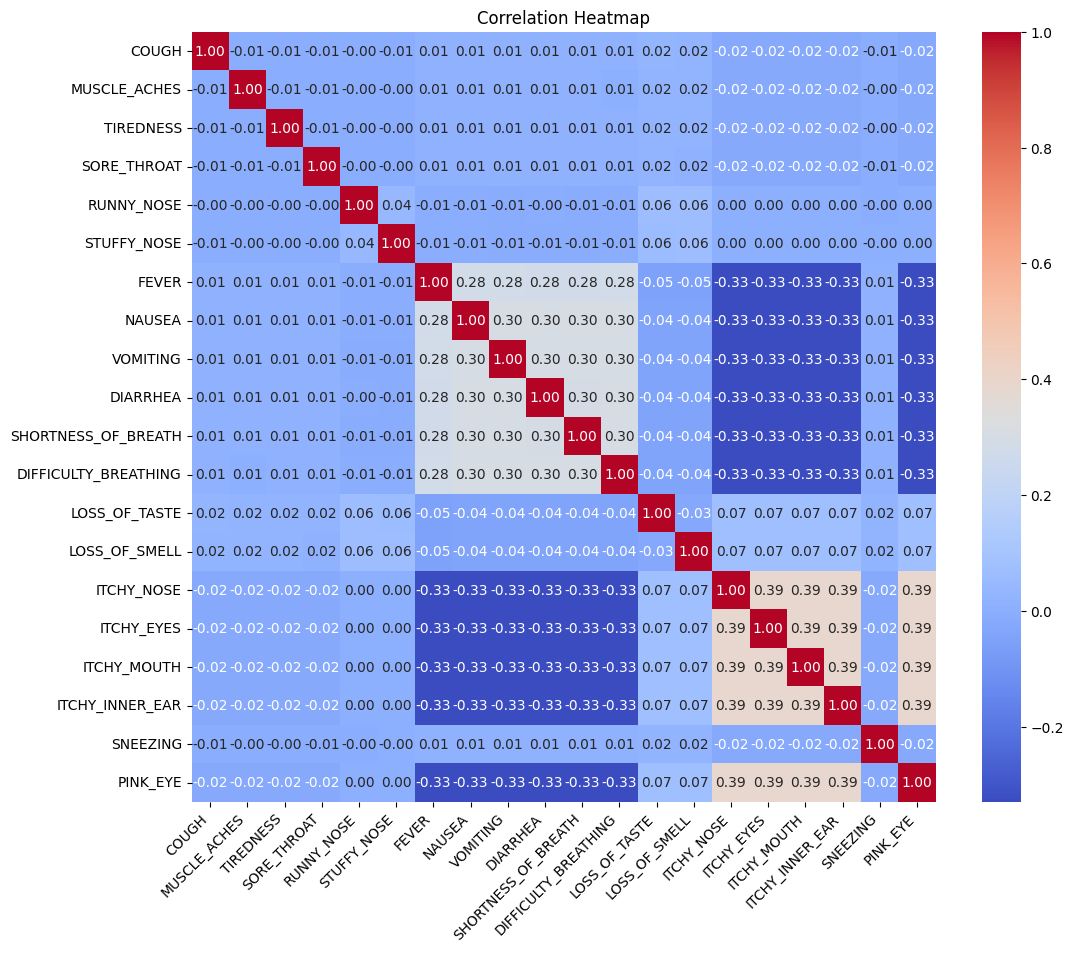

In [173]:
plt.figure(figsize=(12, 10))  
sns.heatmap(correlation, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.title("Correlation Heatmap")
plt.show()

In [174]:
X= df_new

In [175]:
y = df["TYPE"]

In [176]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=42)


In [177]:
X_train.shape

(31117, 20)

In [178]:
Dtree = tree.DecisionTreeClassifier()

In [179]:
Dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [180]:
y_train_pred = Dtree.predict(X_train)
y_test_pred = Dtree.predict(X_test)


In [181]:
y_test_pred

array(['FLU', 'FLU', 'FLU', ..., 'FLU', 'ALLERGY', 'ALLERGY'],
      dtype=object)

In [182]:
confusion_matrix(y_train, y_train_pred)

array([[11403,     0,     0,     0],
       [  265,   471,     0,     0],
       [   15,    27,  1416,     0],
       [  100,   151,   951, 16318]], dtype=int64)

In [183]:
confusion_matrix(y_test, y_test_pred)

array([[4841,  121,    0,   16],
       [ 109,  101,    4,   74],
       [   8,    7,  122,  453],
       [  44,   86,  541, 6809]], dtype=int64)

In [184]:
accuracy_score(y_test, y_test_pred)

0.8902969406118776

In [185]:
#the same with acc
recall_score(y_test, y_test_pred ,average='micro')

0.8902969406118776

In [186]:
recall_score(y_test, y_test_pred ,average='weighted')

0.8902969406118776

In [187]:
recall_score(y_test, y_test_pred ,average='macro')

0.6100617825750239

In [188]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

     ALLERGY       0.97      1.00      0.98     11403
        COLD       0.73      0.64      0.68       736
       COVID       0.60      0.97      0.74      1458
         FLU       1.00      0.93      0.96     17520

    accuracy                           0.95     31117
   macro avg       0.82      0.89      0.84     31117
weighted avg       0.96      0.95      0.95     31117



In [189]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

     ALLERGY       0.97      0.97      0.97      4978
        COLD       0.32      0.35      0.33       288
       COVID       0.18      0.21      0.19       590
         FLU       0.93      0.91      0.92      7480

    accuracy                           0.89     13336
   macro avg       0.60      0.61      0.60     13336
weighted avg       0.90      0.89      0.89     13336



In [198]:
covid_count = df[df["TYPE"] == "COVID"].shape[0]

print(f"Number of rows with 'COVID' in the 'type' column: {covid_count}")

Number of rows with 'COVID' in the 'type' column: 2048


In [199]:
cold_count = df[df["TYPE"] == "COLD"].shape[0]

print(f"Number of rows with 'COLD' in the 'type' column: {cold_count}")

Number of rows with 'COLD' in the 'type' column: 1024


In [200]:
flu_count = df[df["TYPE"] == "FLU"].shape[0]

print(f"Number of rows with 'COLD' in the 'type' column: {flu_count}")

Number of rows with 'COLD' in the 'type' column: 25000


In [201]:
ALLERGY_count = df[df["TYPE"] == "ALLERGY"].shape[0]

print(f"Number of rows with 'COLD' in the 'type' column: {ALLERGY_count}")

Number of rows with 'COLD' in the 'type' column: 16381


In [190]:
import matplotlib.pyplot as plt
from sklearn import tree


In [191]:

# Convert feature names and class names to strings
feature_names = [str(name) for name in X_train.columns]
class_names = [str(name) for name in Dtree.classes_]  # Ensure class names are strings

# Plot the decision tree
plt.figure(figsize=(12, 8))
tree.plot_tree(
    Dtree, 
    feature_names=feature_names, 
    class_names=class_names, 
    filled=True, 
    rounded=True
)
plt.show()

KeyboardInterrupt: 

In [ ]:
feature_names = ["COUGH", "MUSCLE_ACHES", "TIREDNESS", "SORE_THROAT", "RUNNY_NOSE", 
                 "STUFFY_NOSE", "FEVER", "NAUSEA", "VOMITING", "DIARRHEA", 
                 "SHORTNESS_OF_BREATH", "DIFFICULTY_BREATHING", "LOSS_OF_TASTE", 
                 "LOSS_OF_SMELL", "ITCHY_NOSE", "ITCHY_EYES", "ITCHY_MOUTH", 
                 "ITCHY_INNER_EAR", "SNEEZING", "PINK_EYE"]


In [192]:
from sklearn.metrics import ConfusionMatrixDisplay 


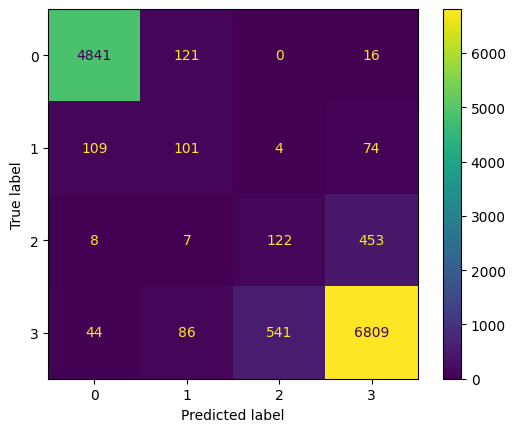

In [193]:
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_test_pred)) 
disp.plot() 
plt.show()

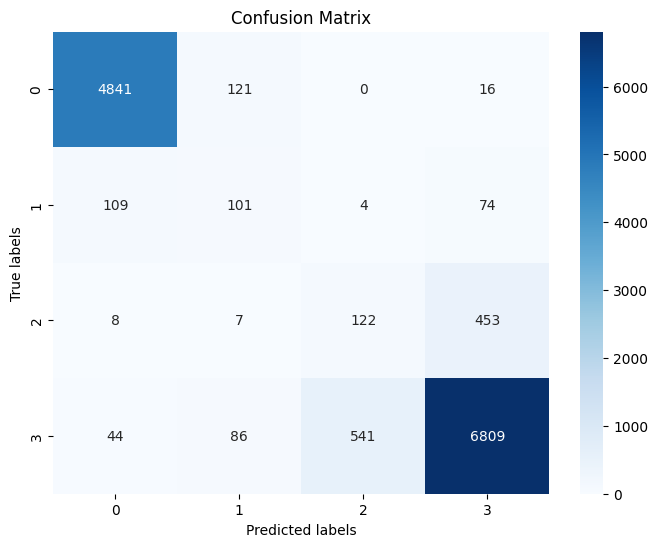

In [194]:
cm = confusion_matrix(y_test, y_test_pred)
# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()